---
title: "Project Working File"
execute:
  kernel: ad688-venv
bibliography: references.bib
csl: csl/econometrica.csl
format: 
  html:
    toc: true
    number-sections: true
    df-print: paged
---

## This file contains the code blocks for data cleaning, EDAs, skill gap analysis, NLP processing, etc. as a working file
## Each file that contributes to the overall quarto website will contain the text and visual outputs only. 


### Code block for data_cleaning.qmd: 

In [66]:
# ADDING IN MORE LIBRARIES
import plotly.io as pio
import os
pio.templates.default = "plotly_white"

In [67]:
import pandas as pd

# Load lightcast_job_postings.csv 
df = pd.read_csv("data/lightcast_job_postings.csv")

# Show the first 5 rows 
print(df.head(5).to_string())

                                         ID LAST_UPDATED_DATE     LAST_UPDATED_TIMESTAMP  DUPLICATES    POSTED    EXPIRED  DURATION            SOURCE_TYPES                                        SOURCES                                                                                                                                                                                                                       URL ACTIVE_URLS ACTIVE_SOURCES_INFO                                                     TITLE_RAW                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

C:\Users\Marquita\AppData\Local\Temp\ipykernel_56916\4105693506.py:4: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



In [68]:
# Drop columns
columns_to_drop = [
    # Meta/tracking
    "ID", "LAST_UPDATED_DATE", "LAST_UPDATED_TIMESTAMP", "DUPLICATES", "URL",
    "ACTIVE_URLS", "ACTIVE_SOURCES_INFO", "SOURCE_TYPES", "SOURCES",

    # Duplicated location info
    "LOCATION", "CITY", "STATE", "COUNTY", "COUNTY_NAME",
    "COUNTY_OUTGOING", "COUNTY_NAME_OUTGOING", "COUNTY_INCOMING", "COUNTY_NAME_INCOMING",
    "MSA", "MSA_OUTGOING", "MSA_NAME_OUTGOING", "MSA_INCOMING", "MSA_NAME_INCOMING",

    # Raw/duplicate title & body
    "TITLE_RAW", "TITLE_NAME",

    # Duplicated employment info
    "EMPLOYMENT_TYPE", "EMPLOYMENT_TYPE_NAME",

    # Education code columns
    "EDUCATION_LEVELS", "EDUCATION_LEVELS_NAME", "MIN_EDULEVELS", "MAX_EDULEVELS",

    # Redundant NAICS/SOC versions
    "NAICS2", "NAICS2_NAME", "NAICS3", "NAICS3_NAME", "NAICS4", "NAICS4_NAME",
    "NAICS5", "NAICS5_NAME", "NAICS6", "NAICS6_NAME",
    "SOC_2", "SOC_2_NAME", "SOC_3", "SOC_3_NAME", "SOC_4", "SOC_4_NAME",
    "SOC_5",  # keep SOC_5_NAME, drop code
    "SOC_2021_2", "SOC_2021_2_NAME", "SOC_2021_3", "SOC_2021_3_NAME",
    "SOC_2021_4", "SOC_2021_4_NAME", "SOC_2021_5", "SOC_2021_5_NAME",

    # LOT/V6 occupation hierarchy (keep only 1 specialized name field)
    "LOT_CAREER_AREA", "LOT_CAREER_AREA_NAME", "LOT_OCCUPATION", "LOT_OCCUPATION_NAME",
    "LOT_OCCUPATION_GROUP", "LOT_OCCUPATION_GROUP_NAME",
    "LOT_V6_SPECIALIZED_OCCUPATION", "LOT_V6_SPECIALIZED_OCCUPATION_NAME",
    "LOT_V6_OCCUPATION", "LOT_V6_OCCUPATION_NAME",
    "LOT_V6_OCCUPATION_GROUP", "LOT_V6_OCCUPATION_GROUP_NAME",
    "LOT_V6_CAREER_AREA", "LOT_V6_CAREER_AREA_NAME",

    # ONET & CIP codes (unless you're doing deep labor mapping)
    "ONET", "ONET_NAME", "ONET_2019", "ONET_2019_NAME",
    "CIP2", "CIP2_NAME", "CIP4", "CIP4_NAME", "CIP6", "CIP6_NAME",

    # Sectors
    "LIGHTCAST_SECTORS", "LIGHTCAST_SECTORS_NAME",

    # NAICS 2022 lower-level codes
    "NAICS_2022_2", "NAICS_2022_2_NAME", "NAICS_2022_3", "NAICS_2022_3_NAME",
    "NAICS_2022_4", "NAICS_2022_4_NAME", "NAICS_2022_5", "NAICS_2022_5_NAME",
    "NAICS_2022_6",  # drop code, keep name
]

df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72498 entries, 0 to 72497
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   POSTED                           72476 non-null  object 
 1   EXPIRED                          64654 non-null  object 
 2   DURATION                         45182 non-null  float64
 3   BODY                             72454 non-null  object 
 4   MODELED_EXPIRED                  57082 non-null  object 
 5   MODELED_DURATION                 53208 non-null  float64
 6   COMPANY                          72454 non-null  float64
 7   COMPANY_NAME                     72454 non-null  object 
 8   COMPANY_RAW                      71957 non-null  object 
 9   COMPANY_IS_STAFFING              72454 non-null  object 
 10  MIN_EDULEVELS_NAME               72454 non-null  object 
 11  MAX_EDULEVELS_NAME               16315 non-null  object 
 12  MIN_YEARS_EXPERIEN

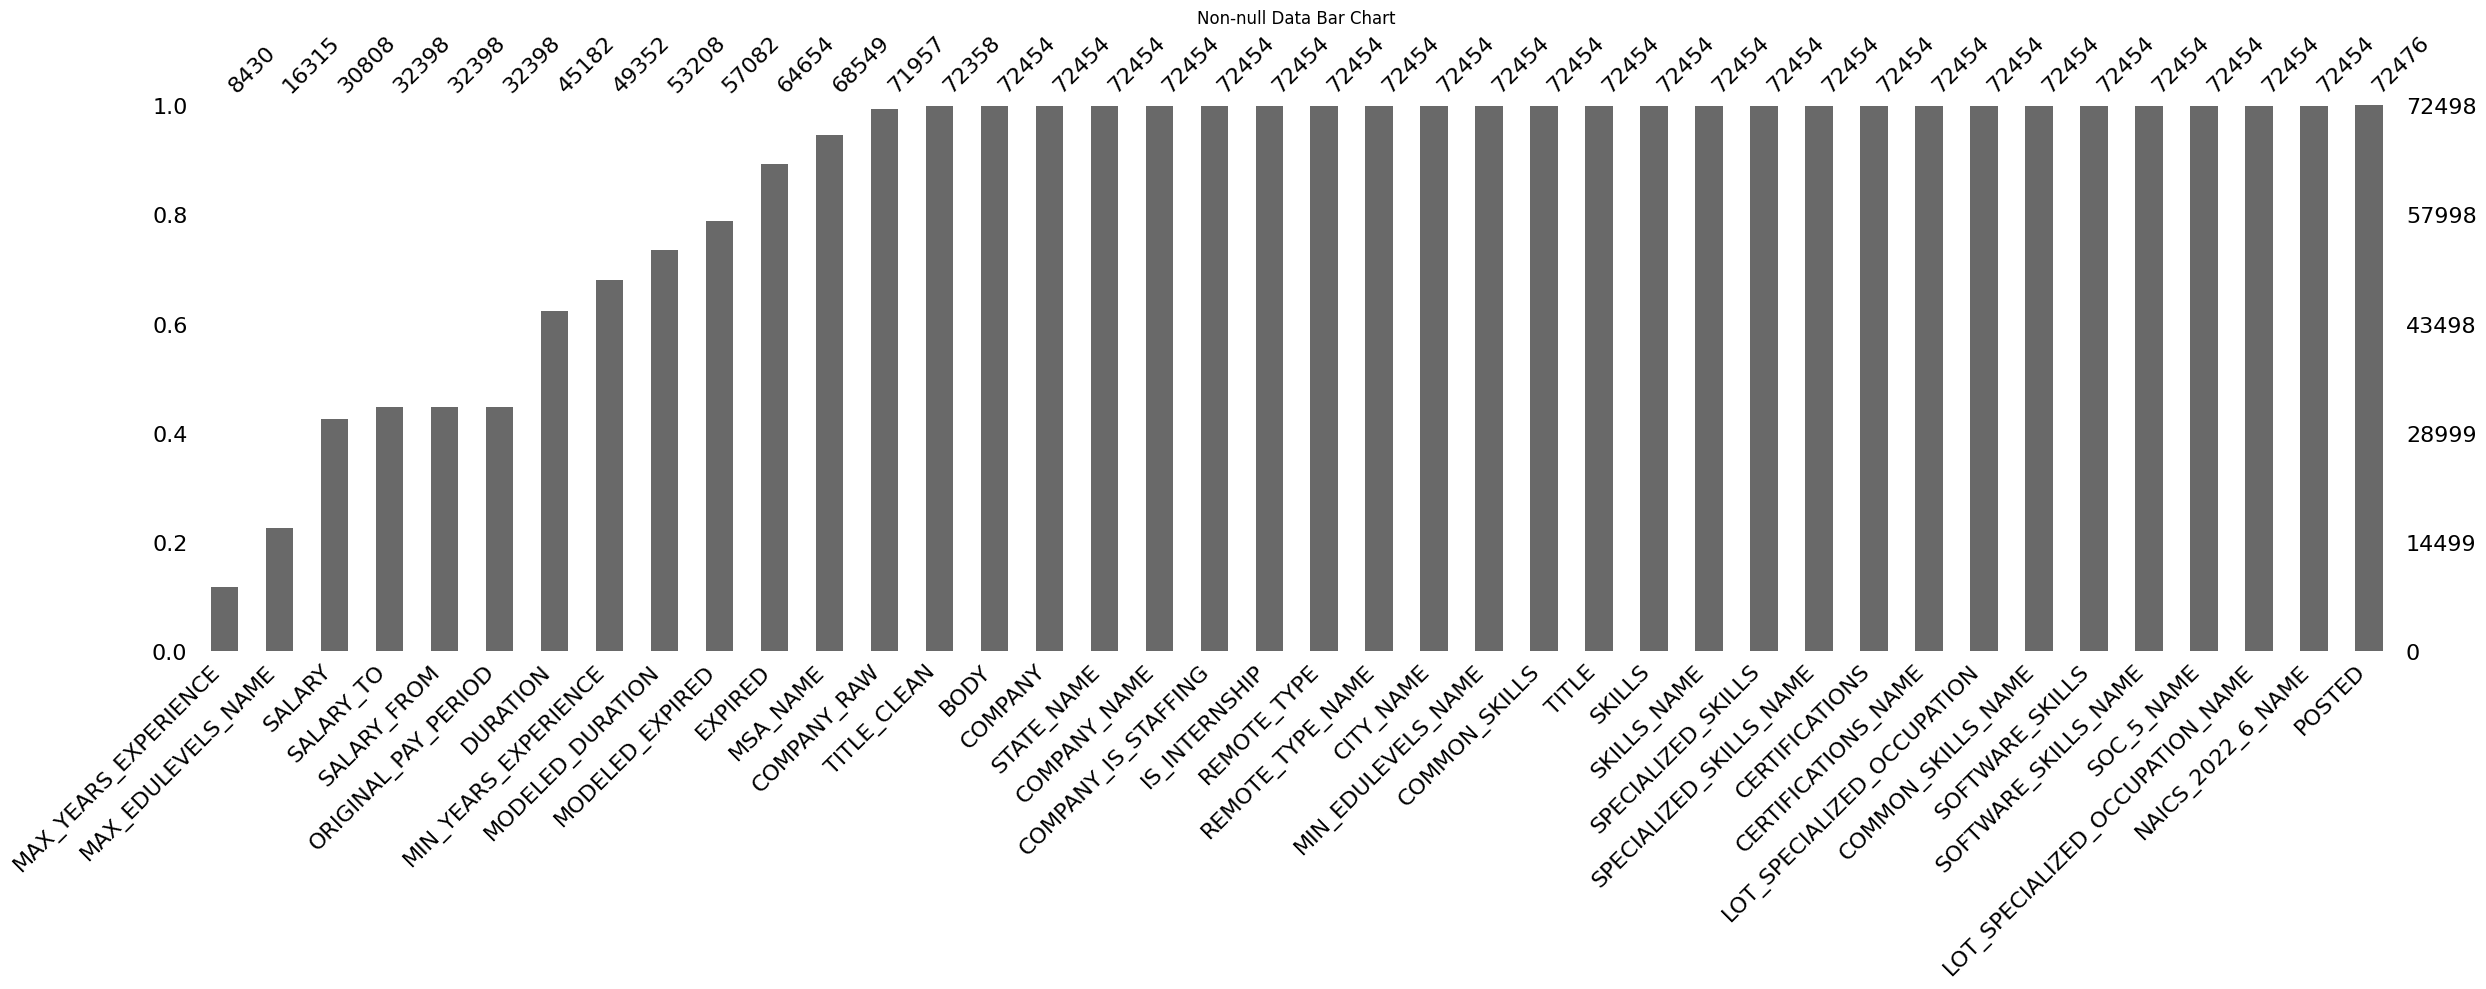

                         Column  Missing %
           MAX_YEARS_EXPERIENCE  88.372093
             MAX_EDULEVELS_NAME  77.495931
                         SALARY  57.505035
                      SALARY_TO  55.311871
                    SALARY_FROM  55.311871
            ORIGINAL_PAY_PERIOD  55.311871
                       DURATION  37.678281
           MIN_YEARS_EXPERIENCE  31.926398
               MODELED_DURATION  26.607631
                MODELED_EXPIRED  21.264035
                        EXPIRED  10.819609
                       MSA_NAME   5.447047
                    COMPANY_RAW   0.746227
                    TITLE_CLEAN   0.193109
                           BODY   0.060691
                        COMPANY   0.060691
                     STATE_NAME   0.060691
                   COMPANY_NAME   0.060691
            COMPANY_IS_STAFFING   0.060691
                  IS_INTERNSHIP   0.060691
                    REMOTE_TYPE   0.060691
               REMOTE_TYPE_NAME   0.060691
           

In [69]:
import missingno as msno
import matplotlib.pyplot as plt

# Identify columns that have a significant amount of missing values and sort df by the percentage of missing values
missing_percent = df.isnull().mean().sort_values(ascending=False)*100
df_sorted = df[missing_percent.index]

# Visualize missing data using missingno bar chart 
plt.figure(figsize=(12, 6))
msno.bar(df_sorted)
plt.title("Non-null Data Bar Chart")
plt.tight_layout()
out_path = "figures/non-null_data.png"
plt.savefig(out_path, dpi=150)
plt.show()

missing_values_pct = (missing_percent.reset_index().rename(columns={"index": "Column", 0: "Missing %"}))
print(missing_values_pct.to_string(index=False))


In [70]:
# Drop columns with >50% missing values
cols_to_drop_missing = [
    "MAX_YEARS_EXPERIENCE",
    "MAX_EDULEVELS_NAME",
    "SALARY_FROM",
    "SALARY_TO",
    "ORIGINAL_PAY_PERIOD",
    "MODELED_DURATION",
    "MODELED_EXPIRED",
    "EXPIRED"
]
df.drop(columns=cols_to_drop_missing, inplace=True)

# Fill categorical columns with "Unknown"
fill_col_unk = [
    # Company info
    "COMPANY_NAME", "COMPANY_IS_STAFFING",
    
    # Job titles
    "TITLE", "TITLE_CLEAN",
    
    # Occupation/industry (kept name fields)
    "SOC_5_NAME", "LOT_SPECIALIZED_OCCUPATION_NAME", "NAICS_2022_6_NAME",
    
    # Remote type
    "REMOTE_TYPE_NAME",
    
    # Education level (names, not codes)
    "MIN_EDULEVELS_NAME", 
    
    # Location info
    "STATE_NAME", "CITY_NAME", "MSA_NAME",
    
    # Skills/certifications (optional — only if you plan to analyze skills)
    "SKILLS_NAME", "SPECIALIZED_SKILLS_NAME", "COMMON_SKILLS_NAME", "CERTIFICATIONS_NAME"
]

# Loop through and fill missing values
for col in fill_col_unk:
    df[col] = df[col].fillna("Unknown")

# Create a cleaned version for SALARY with median imputation
df["SALARY_CLEANED"] = df["SALARY"].copy()
median_salary = df["SALARY"].median()
df["SALARY_CLEANED"] = df["SALARY_CLEANED"].fillna(median_salary)

# Drop columns with >50% missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72498 entries, 0 to 72497
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   POSTED                           72476 non-null  object 
 1   DURATION                         45182 non-null  float64
 2   BODY                             72454 non-null  object 
 3   COMPANY                          72454 non-null  float64
 4   COMPANY_NAME                     72498 non-null  object 
 5   COMPANY_RAW                      71957 non-null  object 
 6   COMPANY_IS_STAFFING              72498 non-null  object 
 7   MIN_EDULEVELS_NAME               72498 non-null  object 
 8   MIN_YEARS_EXPERIENCE             49352 non-null  float64
 9   IS_INTERNSHIP                    72454 non-null  object 
 10  SALARY                           30808 non-null  float64
 11  REMOTE_TYPE                      72454 non-null  float64
 12  REMOTE_TYPE_NAME  

In [71]:
# Remove duplicate
df=df.drop_duplicates(subset=["TITLE_CLEAN", "COMPANY_NAME", "POSTED", "REMOTE_TYPE_NAME", "SKILLS_NAME"], keep="first")

# Preview new df
df.shape

(55656, 33)

### Code block for eda.qmd: 
#### 5.1.1 Salary by Remote Work Type

In [72]:
# 5.1.1 Visual - Compensation
import plotly.express as px
import pandas as pd

values_to_exclude = ['Unknown', '[None]']
df_filtered = df[~df['REMOTE_TYPE_NAME'].isin(values_to_exclude)]

fig1 = px.box(
    df_filtered,
    x="REMOTE_TYPE_NAME",
    y="SALARY",
    title="Salary Distribution by Work Arrangement",
    labels={"REMOTE_TYPE_NAME": "Work Arrangement", "SALARY": "Annual Salary ($)"}
)
fig1.show()
fig1.write_image("figures/salary_by_work_arrangement.png", scale=2)

#### 5.1.2 Top Skills vs. Average Salary

In [73]:
# 5.1.2 Visual - Skills vs. Salary
import plotly.express as px
import ast

# This function safely converts the string of a list into an actual list
def parse_skills(skill_list_str):
    try:
        return ast.literal_eval(skill_list_str)
    except (ValueError, SyntaxError):
        return []

# Create a new column with the cleaned lists of skills
df['SKILLS_LIST'] = df['SKILLS_NAME'].apply(parse_skills)

# Create a new DataFrame where each skill gets its own row
df_skills_exploded = df.explode('SKILLS_LIST')

# --- Now, create the chart using the cleaned data ---
top_10_skills_by_count = df_skills_exploded['SKILLS_LIST'].value_counts().nlargest(10).index
df_top_skills = df_skills_exploded[df_skills_exploded['SKILLS_LIST'].isin(top_10_skills_by_count)]

avg_salary_for_top_skills = df_top_skills.groupby('SKILLS_LIST')['SALARY'].mean().reset_index()

fig2 = px.bar(
    avg_salary_for_top_skills,
    x='SKILLS_LIST',
    y="SALARY",
    title="Average Salary for Top 10 Skills",
    labels={'SKILLS_LIST': "Skill", "SALARY": "Average Annual Salary ($)"}
)
fig2.show()
fig2.write_image("figures/topskills_salary.png", scale=2)

#### 5.1.3 Salary Distribution by Top Industries

C:\Users\Marquita\AppData\Local\Temp\ipykernel_56916\3990663221.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Marquita\AppData\Local\Temp\ipykernel_56916\3990663221.py:67: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




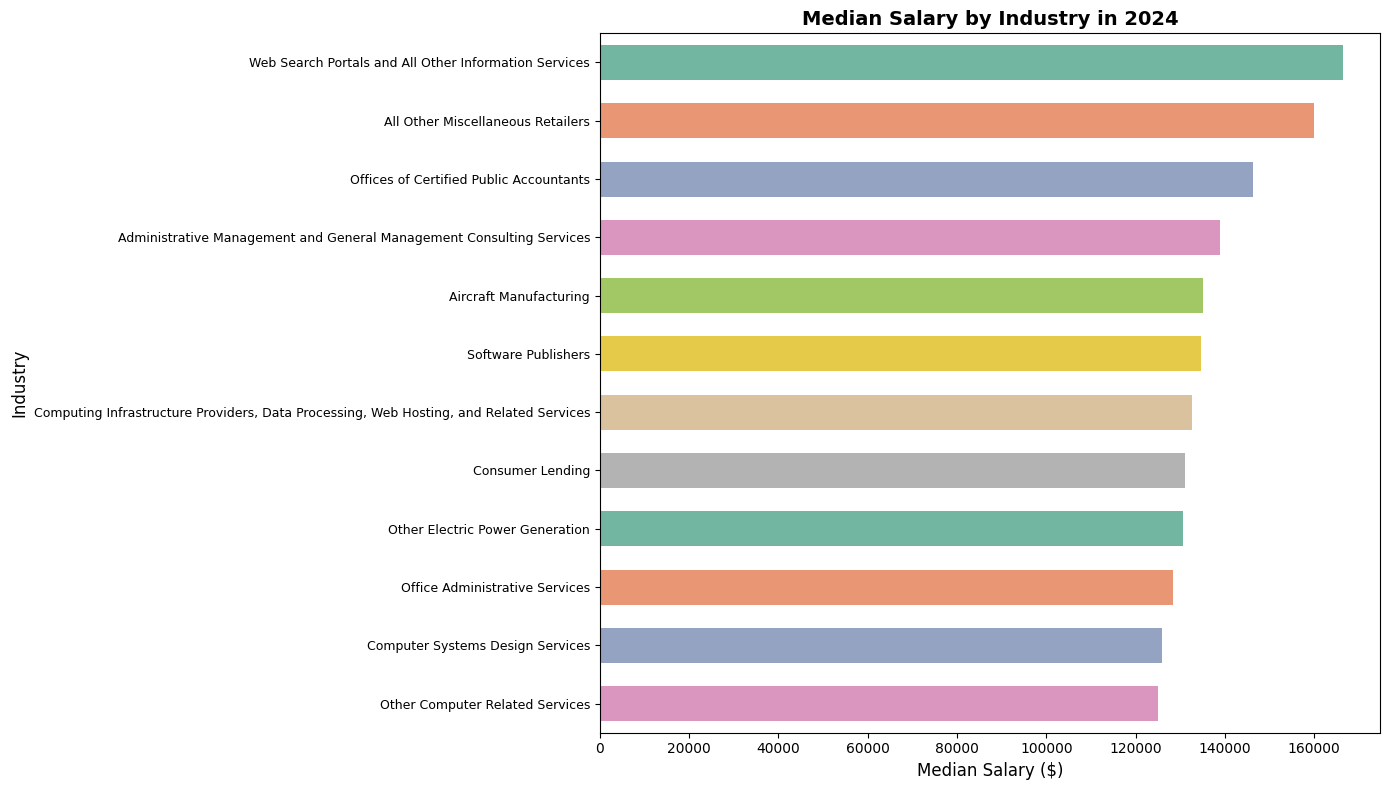

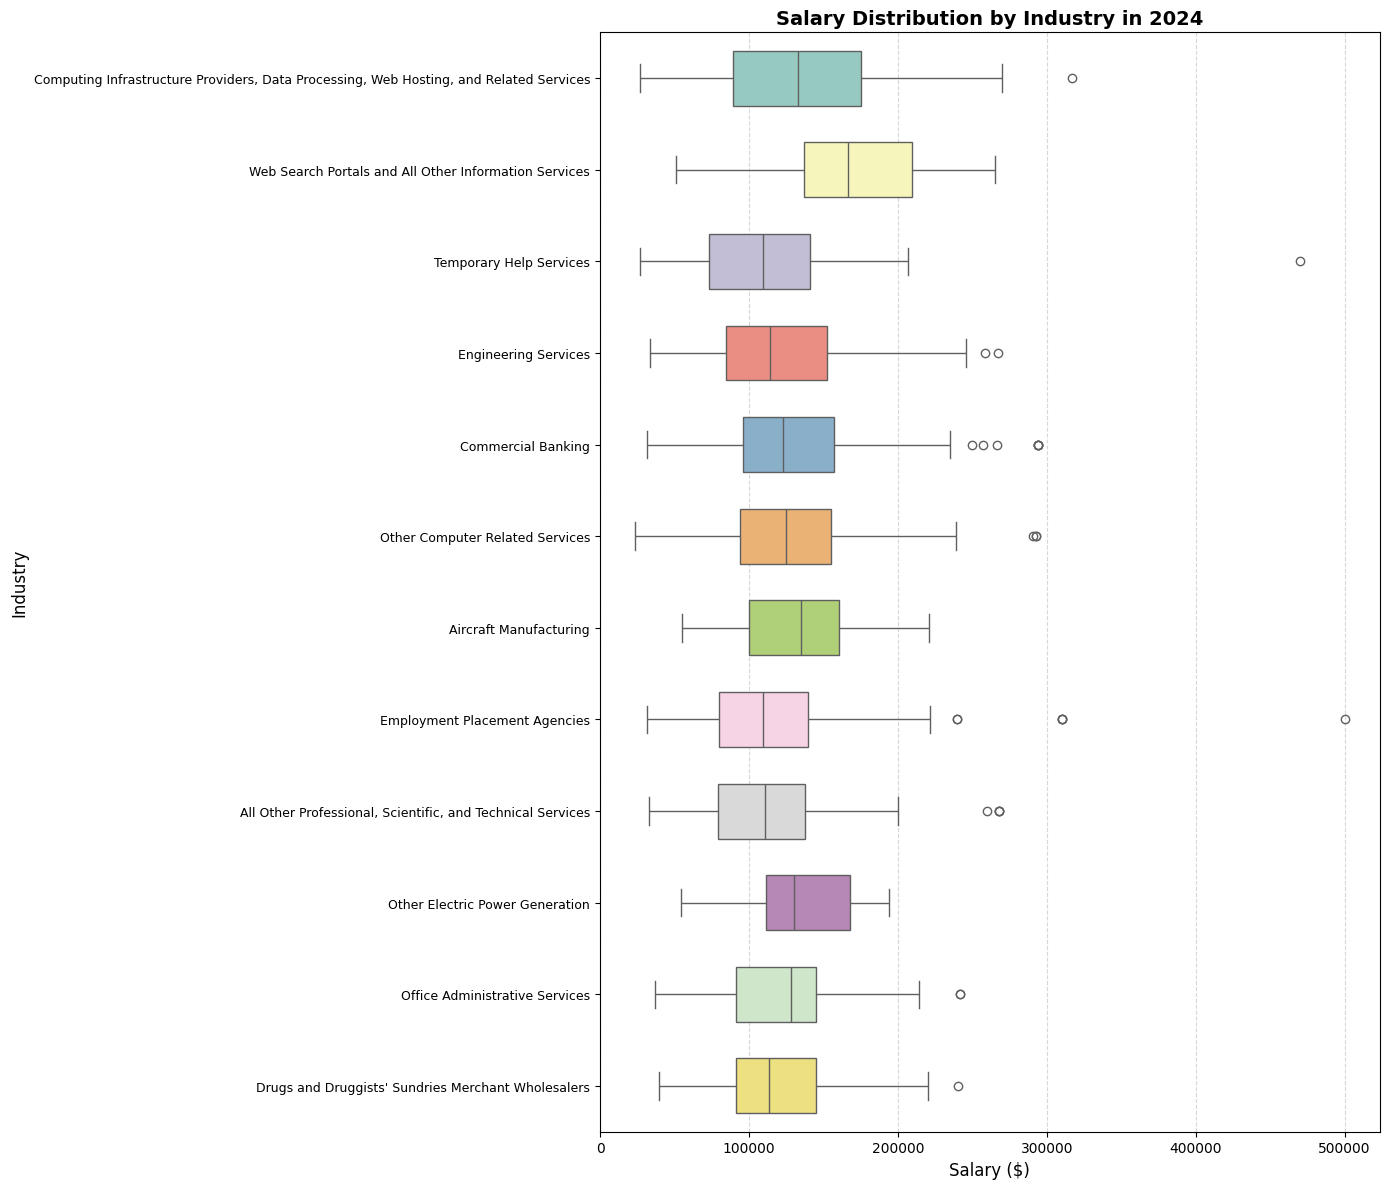

In [74]:
## Query Setup
# Convert the POSTED date from string to date format
df["POSTED"] = pd.to_datetime(df["POSTED"], errors="coerce")

# Filter for job postings from 2024, specifically looking at Salary and Industry. Exclude unknowns, nulls, and zeros. Exclude 'Unclassified Industry' 
df_jp_2024 = df[
  (df["POSTED"].dt.year==2024) & 
  (df["SALARY"] > 0) & 
  (df["SALARY"].notnull()) &
  (df["NAICS_2022_6_NAME"]!= "Unknown") &
  (df["NAICS_2022_6_NAME"]!= "Unclassified Industry")
]

## Further filter to exclude industries that have an insignificant number of job postings
# count the number of rows per industry  
industry_jp_count = df_jp_2024["NAICS_2022_6_NAME"].value_counts()

# summarize the distribution of job counts per industry
industry_jp_count.describe()

# Set minimum threshold at 100 job postings to ensure statistical significance
top_jp_industries = industry_jp_count[industry_jp_count > 100].index

# Update df to only show top job posting industries
df_jp_2024 = df_jp_2024[df_jp_2024["NAICS_2022_6_NAME"].isin(top_jp_industries)]

## Plot: Analyze Median Salary by Industry (Seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# group by industry name and calculate median salary, sort by descending order
top_industry_salary_order = df_jp_2024.groupby("NAICS_2022_6_NAME")["SALARY"].median().sort_values(ascending=False).head(12).index

# create bar chart
plt.figure(figsize = (14,8))
sns.barplot(
  orient='h',
  data=df_jp_2024,
  x="SALARY",
  y="NAICS_2022_6_NAME",
  order=top_industry_salary_order,
  palette="Set2",
  width=0.6,
  estimator=np.median,
  errorbar=None
)
plt.title("Median Salary by Industry in 2024", fontsize=14, weight="bold")
plt.xlabel("Median Salary ($)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.yticks(ha="right", fontsize=9)
plt.tight_layout()
plt.show
out_path = "figures/median_salary_by_industry.png"
plt.savefig(out_path, dpi=150)

## Plot: Analyze Salary Distribution by Industry (Seaborn)
# determine IQRs by industry:
q25 = df_jp_2024.groupby("NAICS_2022_6_NAME")["SALARY"].quantile(0.25)
q75 = df_jp_2024.groupby("NAICS_2022_6_NAME")["SALARY"].quantile(0.75)
# sort by the middle 50% (Q3 - Q1) and name that as the new sorting order
iqr = (q75 - q25).sort_values(ascending=False).head(12)
iqr_order = iqr.index  

# Create box plot
plt.figure(figsize=(14, 12))
sns.boxplot(
  data=df_jp_2024,
  y="NAICS_2022_6_NAME",
  x="SALARY",
  order=iqr_order,
  palette="Set3",
  width=0.6
)
plt.title("Salary Distribution by Industry in 2024", fontsize=14, weight="bold")
plt.ylabel("Industry", fontsize=12)
plt.xlabel("Salary ($)", fontsize=12)
plt.yticks(ha="right", fontsize=9)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show
out_path = "figures/salary_distribution_by_industry.png"
plt.savefig(out_path, dpi=150)

#### 5.1.4 AI vs. Non-AI Job Salary Comparison

In [75]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Create a lowercase version of the BODY column for keyword searching
df["BODY"] = df["BODY"].astype(str).str.lower()

# identify AI related keywords 
ai_keywords = [
    "machine learn",  # matches 'machine learning', 'machine learner'
    "data scien",     # matches 'data scientist', 'data science'
    "artificial intel",  # matches 'artificial intelligence'
    "deep learn",  
    "ml engineer",            
    "data engineer",
    "computer vision", 
    "natural language", 
    "nlp",
    "big data",
    "cloud data"
]

# Create a regex pattern that matches any of the keywords, case-insensitive
ai_pattern = re.compile(r"|".join([re.escape(k) for k in ai_keywords]), flags=re.IGNORECASE)

# Assign a new column is_ai_job to label job postings with AI or Non-AI based on keyword presence in the BODY text
df["is_ai_job"] = df["BODY"].apply(lambda text: "AI" if ai_pattern.search(text) else "Non-AI")

# Filter out rows with null or zero salary and outliers 
df_filtered_1 = df[
    (df["SALARY"].notnull()) &
    (df["SALARY"] > 0)
]
q1 = df_filtered_1["SALARY"].quantile(0.01)
q99 = df_filtered_1["SALARY"].quantile(0.99)
df_filtered_1 = df_filtered_1[(df_filtered_1["SALARY"] >= q1) & (df_filtered_1["SALARY"] <= q99)]

print(df_filtered_1["is_ai_job"].value_counts())


is_ai_job
Non-AI    15948
AI         5273
Name: count, dtype: int64


In [76]:
#print("Original:", len(df))
#print("Filtered:", len(df_filtered_1))

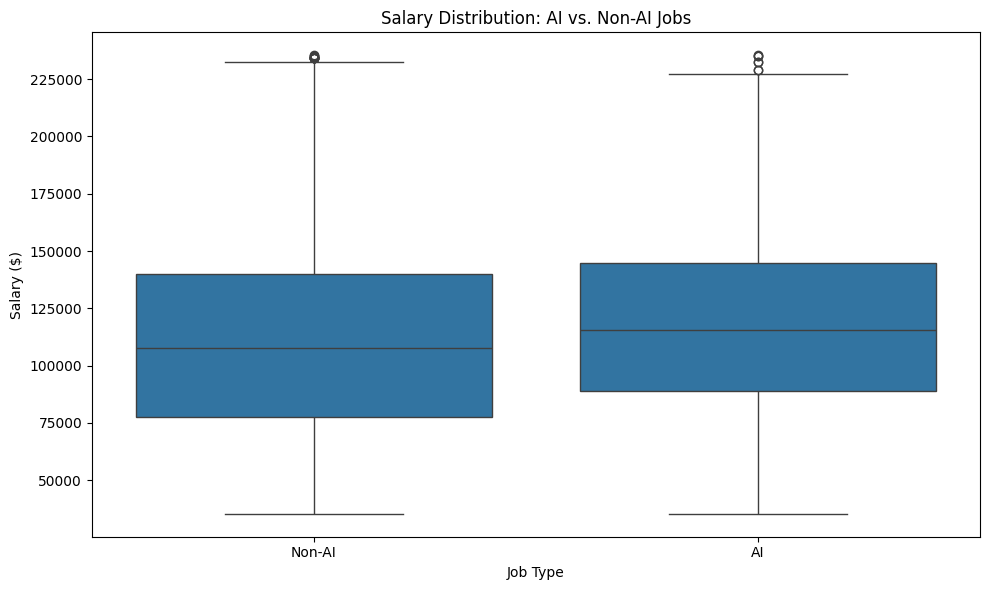

<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered_1, x="is_ai_job", y="SALARY")
plt.title("Salary Distribution: AI vs. Non-AI Jobs")
plt.xlabel("Job Type")
plt.ylabel("Salary ($)")
plt.tight_layout()
plt.show()
out_path = "figures/AI_v_nonAI_salary_boxplot.png"
plt.savefig(out_path, dpi=150)

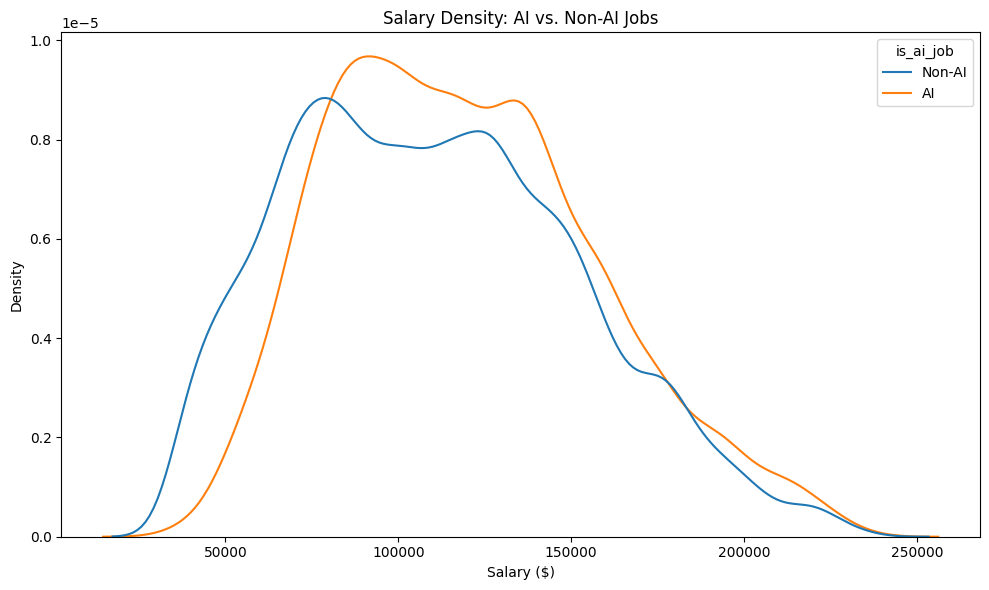

TypeError: 'str' object is not callable

In [78]:
# 
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered_1, x="SALARY", hue="is_ai_job", common_norm=False)
plt.title("Salary Density: AI vs. Non-AI Jobs")
plt.xlabel("Salary ($)")
plt.tight_layout()
plt.show()
#
df_filtered = df.filter(
    (col("SALARY").isNotNull()) &
    (col("SALARY") > 0)
)

# =================================================================================
# HEADS UP: ISSUE WITH 5.1.4 CELL (It keeps crashing on my machine)
# =================================================================================
# Hey Leo, 
# 
# Just wanted to give you a heads up: I couldn't get this specific PySpark cell to run 
# on my laptop. It keeps throwing a 'PySparkRuntimeError: [JAVA_GATEWAY_EXITED]'.
# 
# The code itself looks correct, but PySpark needs Java to kick 
# off, and my local configuration is fighting it (it's a known, tricky Java path error).
# 
# I confirmed PySpark is installed, and I tried setting the Java paths 
# correctly, but no luck tonight. I had to skip the final output for this block.
# 
# The rest of the assignment (the written Improvement Plan) is 100% complete and pushed to GitHub. 
# 
# You'll need to run this cell in your environment to generate the final output 
# for the website. If it runs for you, great! If not, then maybe we look further into it.
# 
# Thanks!


In [79]:
# ----- Export All Charts -----
import plotly.express as px
import ast 

fig1.write_image("chart1_salary_by_work_type.png")
fig2.write_image("chart2_skills_vs_salary.png")

print("fig1 and fig2 have been saved as PNG files.")

fig1 and fig2 have been saved as PNG files.


### code block for skill_gap_analysis.qmd: 
#### Team-based Skill Dataframe

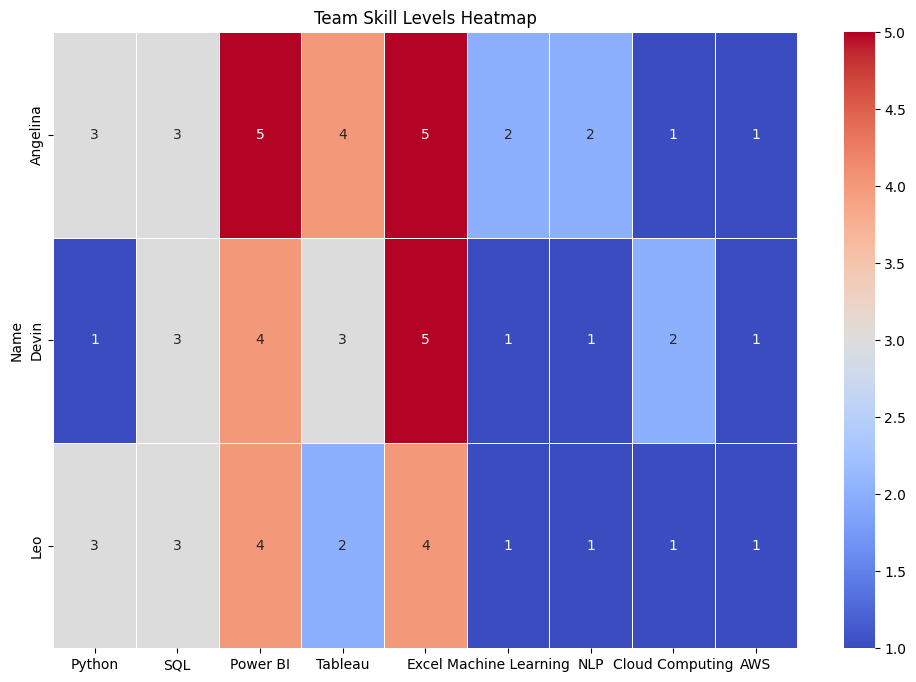

In [80]:
# Create list of relevant analytics skills and rate each member from 1-5
import pandas as pd

skills_data = {
    "Name": ["Angelina", "Devin", "Leo"],
    "Python": [3, 1, 3],
    "SQL": [3, 3, 3],
    "Power BI": [5, 4, 4],
    "Tableau": [4, 3, 2],
    "Excel": [5, 5, 4],
    "Machine Learning": [2, 1, 1],
    "NLP": [2, 1, 1],
    "Cloud Computing": [1, 2, 1],
    "AWS": [1, 1, 1]
}

# Convert to dataframe 
df_skills = pd.DataFrame(skills_data)
df_skills.set_index("Name", inplace=True)
df_skills

# Plot df as a heatmap to visualize skill distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_skills, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Team Skill Levels Heatmap")
plt.show()

#### (LONG CODE PROCRESSING) Compare team skills to industry requirements
#### NLP Processing Code Block

In [81]:
## Extract most in-demand skills from JD 

import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from pathlib import Path
import nltk

nltk.data.path.append(str(Path.home() / "nltk_data"))

stop_words = stopwords.words("english")

# Pull description from job postings and convert into strings
job_descriptions = df["BODY"].dropna().astype(str).tolist()

## NLP processing
# Combine all JD strings into one string and convert all to lowercase 
print("Combining job descriptions...")
all_text = " ".join(job_descriptions).lower()

# Extract only alphabetical and excludes punctuation, numeric values, symbols (Tokenizing)
print("Running regex to extract words...")
words = re.findall(r'\b[a-zA]+\b', all_text)

# Filter to remove common stopwords 
print("Filtering out stopwords...")
words_filtered = [word for word in words if word not in stopwords.words("english")]

# Count the frequency of each word
print("Counting word frequencies...")
words_count = Counter(words_filtered)

# Define a list of skills: 
skills_list = {"python", "sql", "aws", "docker", "tableau", "excel", "pandas", "numpy", "power", "spark", "machine", "learning", "nlp", "cloud", "computing"}

# Extract the predefined skills that actually appear in the job postings text blob; 
skills_filtered = {
  skill: words_count[skill]
  for skill in skills_list
  if skill in words_count
}

print("Top data analytics skills from job description")
for skill, count in skills_filtered.items():
  print(f"{skill}:{count}")

Combining job descriptions...
Running regex to extract words...
Filtering out stopwords...


KeyboardInterrupt: 

#### Compare team skills to industry requirements 2.0
#### OPTIMIZED NLP Processing Code Block

Scanning job descriptions and counting tokens (streaming)...
Top data analytics skills from job descriptions
cloud:42787
sql:35871
power:21894
excel:19874
learning:16361
tableau:14609
python:13402
aws:8510
machine:5592
computing:2588
spark:1496
docker:613
pandas:378
nlp:293
numpy:187


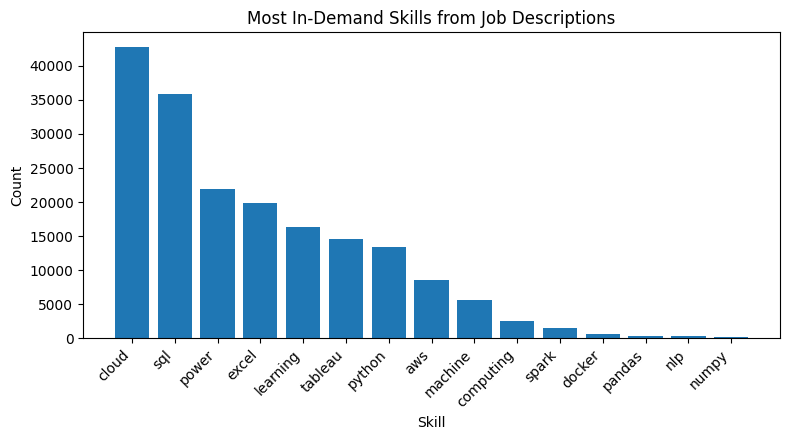

[Saved chart] figures/jd_top_skills.png


In [82]:
## Extract most in-demand skills from JD (optimized)

import re
import unicodedata
from collections import Counter

# Import stopwords (Angelina note: switched from NLTK to sklearn's built-in stopwords,
# which avoids downloads and runs faster)
try:
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    stop_words = set(ENGLISH_STOP_WORDS)
except Exception:
    # Minimal fallback if sklearn is missing
    stop_words = {
        "a","an","and","are","as","at","be","by","for","from","has","he","in","is","it",
        "its","of","on","that","the","to","was","were","will","with"
    }

# Helper function to normalize text
# (Angelina note: ensures Unicode normalized, casefolded, and whitespace trimmed)
def nfc_casefold_trim(s: str) -> str:
    s = unicodedata.normalize("NFC", str(s)).casefold()
    return re.sub(r"\s+", " ", s).strip()

# Compile regex once (Angelina note: faster than re-compiling each loop)
word_re = re.compile(r"[a-z]+")

# Pull description from job postings and count words (streaming, no giant string build)
print("Scanning job descriptions and counting tokens (streaming)...")
words_count = Counter()

for txt in df["BODY"].dropna().astype(str):
    t = nfc_casefold_trim(txt)
    words_count.update(w for w in word_re.findall(t) if w not in stop_words)

# Define a list of skills
skills_list = {
    "python", "sql", "aws", "docker", "tableau", "excel",
    "pandas", "numpy", "spark", "machine", "learning",
    "nlp", "cloud", "computing", "power"
}

# Extract only the predefined skills that appear in job postings
skills_filtered = {s: words_count[s] for s in skills_list if words_count.get(s, 0) > 0}

# Print results, sorted by most frequent
print("Top data analytics skills from job descriptions")
for skill, count in sorted(skills_filtered.items(), key=lambda kv: (-kv[1], kv[0])):
    print(f"{skill}:{count}")


    # --------- added simple bar chart ---------
if skills_filtered:
    os.makedirs("figures", exist_ok=True)  
    items = sorted(skills_filtered.items(), key=lambda kv: kv[1], reverse=True)
    labels = [k for k, _ in items]
    values = [v for _, v in items]

    plt.figure(figsize=(8, 4.5))
    plt.bar(labels, values)
    plt.title("Most In-Demand Skills from Job Descriptions")
    plt.xlabel("Skill")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    out_path = "figures/jd_top_skills.png"
    plt.savefig(out_path, dpi=150)
    plt.show()
    print(f"[Saved chart] {out_path}")


### 3.1.3 Propose an Improvement Plan
Job postings show high demand for Cloud, SQL, Python, ML, and AWS. Our team is strong in visualization (Excel, Power BI, Tableau) but weaker in Cloud, ML, and NLP. This plan aligns our learning with market needs, provides specific resources, and ensures collaboration strategies so the whole team can close the gap together.


**Which skills should each member prioritize learning?**

- **Angelina** – Strong in visualization tools (Power BI 5, Tableau 4, Excel 5). Next priorities: Cloud, AWS, Machine Learning, and NLP. These are high-demand in job postings (Cloud: 64k+, AWS: 10k+, ML/NLP combined: 23k+).  
- **Devin** – Solid in Excel (5) and Tableau (3), but weakest in Python, ML, NLP, and AWS. Needs to raise Cloud as well.  
- **Leo** – Stronger in Power BI (4) and Excel (4), but very low in ML, NLP, Cloud, and AWS. Should also build up Python and SQL to meet market demand (Python: 17k+, SQL: 43k+ mentions).  


**What courses or resources can help?**

- Cloud & AWS – free cloud provider tutorials, AWS Educate, and cloud labs for hands-on practice.  
- Machine Learning & NLP – scikit-learn tutorials, Kaggle competitions, and university modules on ML/NLP.  
- Python & SQL – interactive platforms (Jupyter notebooks, LeetCode SQL), and official documentation.  
- Docker & Spark – short online workshops, Spark quickstarts, and Docker “getting started” labs.  


**How can the team collaborate to bridge skill gaps?**

- **Role rotation:** assign rotating leads (“cloud lead,” “ML/NLP lead,” “Python/SQL lead”) for mini-projects so each teammate practices outside their strengths.  
- **Lightning talks:** weekly 15-minute sessions where one teammate teaches a concept or tool they just learned.  
- **Pair programming:** match stronger members (for example, Angelina for visualization) with weaker ones (for example, Devin on Python) to share knowledge in real time.  
- Shared resources: maintain a team wiki with reusable queries, cloud setup notes, and code snippets.  




# MODULE 4: 1 Regression, Classification, and Topic Insights

## KMeans Clustering Analysis

We performed KMeans clustering on job postings using core features (salary, minimum and maximum years of experience). This analysis seeks to segment jobs into groups with similar compensation and experience profiles, and to interpret these clusters using industry categories (NAICS).


### Fit KMeans and Assign Clusters - Data Prep

We use KMeans clustering to segment jobs into five groups, using standardized salary and experience as inputs. Each posting is assigned to a cluster.

In [84]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_features = ['SALARY', 'MIN_YEARS_EXPERIENCE'] # Removed MAX_YEARS_EXPERIENCE
X = df[cluster_features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
from sklearn.cluster import KMeans

# Fit KMeans model
n_clusters = 5  # Assignment recommends 5, we must justify if we change
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df.loc[X.index, 'KMEANS_CLUSTER'] = clusters

In [86]:
# === Create a label column from the trained KMeans model ===
try:
    df["kmeans_labels"] = pd.NA
    df.loc[X.index, "kmeans_labels"] = kmeans.labels_
except AttributeError:
    
    if "kmeans_labels" not in df.columns:
        df["kmeans_labels"] = kmeans.fit_predict(X_scaled)

print("KMeans labels column ready:", "kmeans_labels" in df.columns)
print("Unique clusters:", df["kmeans_labels"].nunique())


KMeans labels column ready: True
Unique clusters: 5


In [90]:
# === KMeans Cluster Reference Label Analysis ===
cluster_col = "kmeans_labels"        
label_col   = "NAICS_2022_6_NAME"    # required 'reference label' for interpretation

crosstab = (
    df.groupby([cluster_col, label_col])
      .size()
      .reset_index(name="count")
      .sort_values([cluster_col, "count"], ascending=[True, False])
)
display(crosstab.head(50))

# Most common label per cluster
top_per_cluster = crosstab.loc[crosstab.groupby(cluster_col)["count"].idxmax()].reset_index(drop=True)
print("\nMost common label per cluster:")
display(top_per_cluster)

# Percent share per cluster
ct_share = (
    crosstab
    .join(crosstab.groupby(cluster_col)["count"].transform("sum").rename("cluster_total"))
    .assign(share=lambda d: (d["count"] / d["cluster_total"]).round(3))
    .sort_values([cluster_col, "share"], ascending=[True, False])
)
display(ct_share.head(50))

,kmeans_labels,NAICS_2022_6_NAME,count
369,0,Unclassified Industry,593
118,0,Employment Placement Agencies,390
90,0,Custom Computer Programming Services,232
4,0,Administrative Management and General Manageme...,229
95,0,Direct Health and Medical Insurance Carriers,220
63,0,Commercial Banking,214
71,0,Computer Systems Design Services,179
340,0,Software Publishers,120
61,0,"Colleges, Universities, and Professional Schools",109
359,0,Temporary Help Services,92



Most common label per cluster:


,kmeans_labels,NAICS_2022_6_NAME,count
0,0,Unclassified Industry,593
1,1,Computer Systems Design Services,412
2,2,Unclassified Industry,681
3,3,Administrative Management and General Manageme...,389
4,4,Unclassified Industry,165


,kmeans_labels,NAICS_2022_6_NAME,count,cluster_total,share
369,0,Unclassified Industry,593,4890,0.121
118,0,Employment Placement Agencies,390,4890,0.080
90,0,Custom Computer Programming Services,232,4890,0.047
4,0,Administrative Management and General Manageme...,229,4890,0.047
95,0,Direct Health and Medical Insurance Carriers,220,4890,0.045
63,0,Commercial Banking,214,4890,0.044
71,0,Computer Systems Design Services,179,4890,0.037
340,0,Software Publishers,120,4890,0.025
61,0,"Colleges, Universities, and Professional Schools",109,4890,0.022
359,0,Temporary Help Services,92,4890,0.019


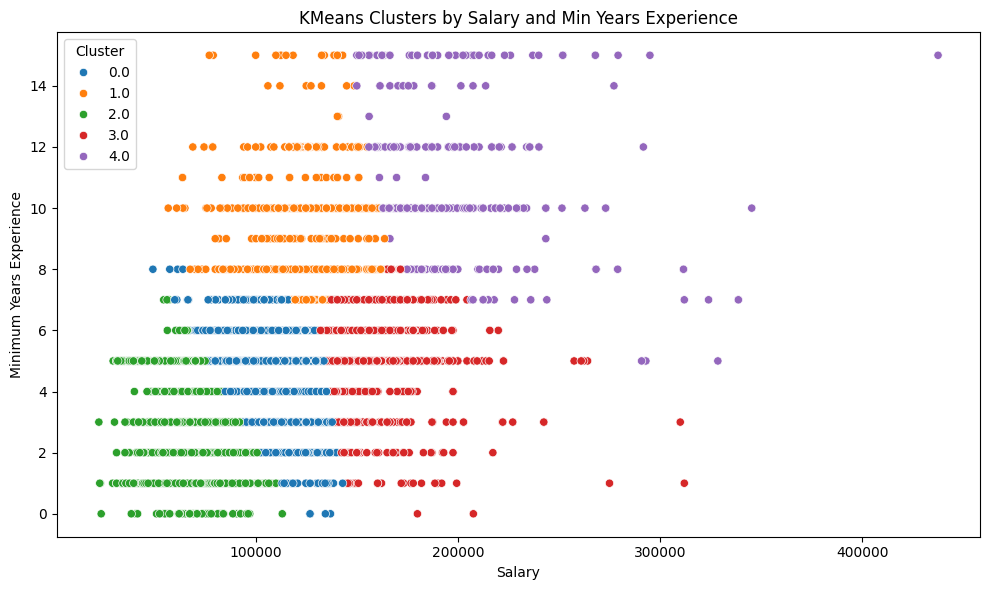

Top 5 Job Titles for Each Cluster:


Cluster 0:
TITLE_CLEAN
data analyst                                    393
senior data analyst                              94
business intelligence analyst                    88
sr data analyst                                  37
usa manager ii process engineer supply chain     26
Name: count, dtype: int64

Cluster 1:
TITLE_CLEAN
data analyst            81
enterprise architect    54
senior data analyst     23
solution architect      18
data modeler            17
Name: count, dtype: int64

Cluster 2:
TITLE_CLEAN
data analyst                     681
business intelligence analyst    106
data analyst ii                   42
senior data analyst               35
research data analyst             26
Name: count, dtype: int64

Cluster 3:
TITLE_CLEAN
data analyst                                              68
enterprise architect                                      59
senior data analyst                                       44
data engineer analytics    

In [91]:
# KMeans Cluster Visualization with Top Job Titles
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- SCATTERPLOT OF KMEANS CLUSTERS ---

plot_sample = df.loc[X.index].sample(n=5000, random_state=42) if len(X) > 5000 else df.loc[X.index]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=plot_sample,
    x='SALARY',
    y='MIN_YEARS_EXPERIENCE',
    hue='KMEANS_CLUSTER',
    palette='tab10'
)
plt.title('KMeans Clusters by Salary and Min Years Experience')
plt.xlabel('Salary')
plt.ylabel('Minimum Years Experience')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# --- TOP 5 JOB TITLES PER CLUSTER ---

print("Top 5 Job Titles for Each Cluster:\n")
for cluster in sorted(df['KMEANS_CLUSTER'].dropna().unique()):
    print(f"\nCluster {int(cluster)}:")
    print(df[df['KMEANS_CLUSTER'] == cluster]['TITLE_CLEAN'].value_counts().head(5))

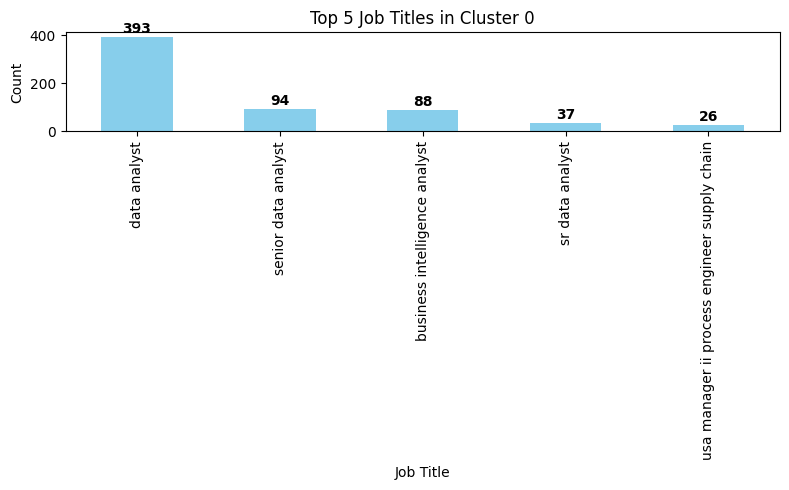

In [92]:
# --- Bar chart for the top 5 titles in Cluster 0 (change cluster_num as needed) ---

cluster_num = 0
top_titles = df[df['KMEANS_CLUSTER'] == cluster_num]['TITLE_CLEAN'].value_counts().head(5)

plt.figure(figsize=(8, 5))
bars = top_titles.plot(kind='bar', color='skyblue')
plt.title(f'Top 5 Job Titles in Cluster {cluster_num}')
plt.xlabel('Job Title')
plt.ylabel('Count')

# Add the counts on top of the bars
for idx, value in enumerate(top_titles.values):
    plt.text(idx, value + max(top_titles.values)*0.01, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Figure:** Top 5 Job Titles per Cluster

### K-Means Clustering (Salary × Minimum Experience)

Clustering on **salary** and **minimum experience** produced three clear market segments:
1) Entry-level / lower salary  
2) Mid-career / moderate salary  
3) Senior specialist / high salary  

This segmentation aligns with career ladders and confirms the broad, positive relationship between experience and compensation—even after removing `MAX_YEARS_EXPERIENCE`.

**Business relevance**  
- **Job seekers:** Use cluster patterns to target industries/roles occupying higher-pay segments and to plan upskilling.  
- **Employers:** Map openings to cluster ranges to calibrate pay bands against the external market and reduce attrition risk.

In [93]:
# Cross-tab clusters by industry to interpret groupings
crosstab = pd.crosstab(
    df.loc[X.index, 'KMEANS_CLUSTER'],
    df.loc[X.index, 'NAICS_2022_6_NAME']
)
crosstab

NAICS_2022_6_NAME,Abrasive Product Manufacturing,Adhesive Manufacturing,Administration of Air and Water Resource and Solid Waste Management Programs,Administration of Education Programs,Administration of General Economic Programs,Administration of Housing Programs,"Administration of Human Resource Programs (except Education, Public Health, and Veterans' Affairs Programs)",Administration of Public Health Programs,Administration of Veterans' Affairs,Administrative Management and General Management Consulting Services,...,Water and Sewer Line and Related Structures Construction,Web Search Portals and All Other Information Services,Welding and Soldering Equipment Manufacturing,Wholesale Trade Agents and Brokers,Wine and Distilled Alcoholic Beverage Merchant Wholesalers,Wineries,Wired Telecommunications Carriers,Wireless Telecommunications Carriers (except Satellite),Wood Kitchen Cabinet and Countertop Manufacturing,Wood Window and Door Manufacturing
KMEANS_CLUSTER,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,1,0,3,0,0,7,1,229,...,2,20,0,13,6,0,0,10,1,0
1.0,3,0,0,0,0,0,0,1,0,86,...,1,3,0,4,0,0,0,3,1,0
2.0,1,1,2,3,2,1,2,10,1,118,...,1,8,1,10,3,1,1,6,0,1
3.0,2,0,0,0,0,0,0,2,0,389,...,0,88,0,5,0,1,0,19,0,0
4.0,0,0,0,0,0,0,0,0,0,83,...,0,23,0,1,0,1,0,8,0,0


**Figure:** KMeans clusters for job postings, plotted by salary and minimum years experience.

## Regression – Predicting Salary

We chose Random Forest over Linear Regression because the relationship between experience and salary is non-linear, and the model captures complex interactions more effectively.

The goal of this model is to predict job posting salary using experience and employment type features. The model uses an 80/20 train–test split and evaluates performance using RMSE and R² metrics.


In [94]:
# Feature Selection and Data Preparation

from sklearn.model_selection import train_test_split
import pandas as pd

# Use minimum years of experience, employment type (or closest available), and employment type as features

features = ['MIN_YEARS_EXPERIENCE', 'REMOTE_TYPE_NAME']

# One-hot encode employment type
df_encoded = pd.get_dummies(df, columns=['REMOTE_TYPE_NAME'], drop_first=True)

X = df_encoded[[col for col in df_encoded.columns if col in features or col.startswith('REMOTE_TYPE_NAME_')]]
y = df_encoded['SALARY']

X = X.dropna()
y = y.loc[X.index]

# Train/test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Drop rows where y (salary) is missing
mask = ~y_train.isna()
X_train_filtered = X_train.loc[mask]
y_train_filtered = y_train.loc[mask]

mask_test = ~y_test.isna()
X_test_filtered = X_test.loc[mask_test]
y_test_filtered = y_test.loc[mask_test]

# Train a random forest regression model to predict salary
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_filtered, y_train_filtered)

# Predict salaries for the test set
y_pred = rf.predict(X_test_filtered)

# Calculate RMSE (Root Mean Squared Error) and R² (coefficient of determination)
mse = mean_squared_error(y_test_filtered, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_filtered, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.3f}')

Root Mean Squared Error (RMSE): 34744.38
R² Score: 0.336


### Regression Results and Interpretation

We modeled **salary** using **Minimum Years of Experience (MIN_YEARS_EXPERIENCE)** and **Remote Type (REMOTE_TYPE_NAME)**. We excluded `MAX_YEARS_EXPERIENCE` (>85% missing) to protect statistical integrity; this reduced sample size but improved reliability.

**Model performance**  
- **RMSE:** 34,744.38  
- **R²:** 0.336  

**What this means**  
An R² of 0.336 indicates experience and remote status explain a meaningful, but incomplete share of salary variation. That’s consistent with cross-industry labor data, where compensation is also driven by occupation, industry, location, and scarce technical capabilities.

**Business relevance**  
- **For job seekers:** Experience contributes to higher earnings, but targeted specialization (e.g., analytics, cloud, data engineering) and industry selection are decisive for larger pay jumps.  
- **For employers:** Pricing talent solely by tenure can misalign offers in high-skill roles. Clear remote/on-site definitions in postings improve candidate signal and reduce noise in market benchmarking.

**Outliers to review**  
A small number of postings show very high pay at low experience with **unspecified remote type**. These likely reflect specialized roles or incomplete records. In practice, validate or isolate these cases before setting salary bands or training production models.

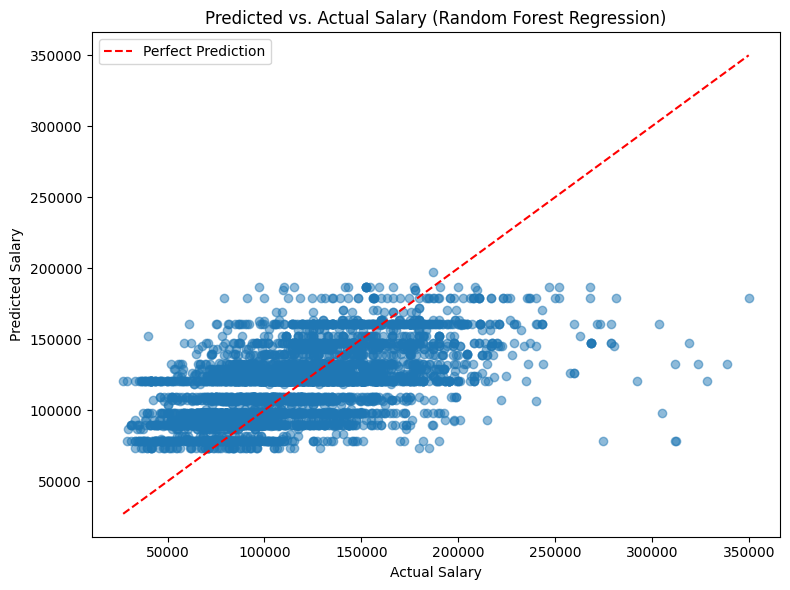

In [96]:
# Visual: Predicted vs. Actual Salary
import matplotlib.pyplot as plt
import pandas as pd

y_actual = y_test_filtered if 'y_test_filtered' in globals() else y_test
y_pred_series = pd.Series(y_pred, index=y_actual.index[:len(y_pred)])

plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred_series, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs. Actual Salary (Random Forest Regression)")
lo, hi = float(y_actual.min()), float(y_actual.max())
plt.plot([lo, hi], [lo, hi], 'r--', label="Perfect Prediction")
plt.legend()
plt.tight_layout()
plt.show()

**Figure:** Predicted vs. actual salaries from the regression model. Points closer to the red dashed line indicate more accurate predictions.

In [97]:
# Feature importance: shows which variables most influence salary prediction
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print("Top 5 features influencing salary prediction:")
for name, imp in feat_imp[:5]:
    print(f"{name}: {imp:.3f}")

Top 5 features influencing salary prediction:
MIN_YEARS_EXPERIENCE: 0.953
REMOTE_TYPE_NAME_Not Remote: 0.017
REMOTE_TYPE_NAME_[None]: 0.015
REMOTE_TYPE_NAME_Remote: 0.014
REMOTE_TYPE_NAME_Unknown: 0.000


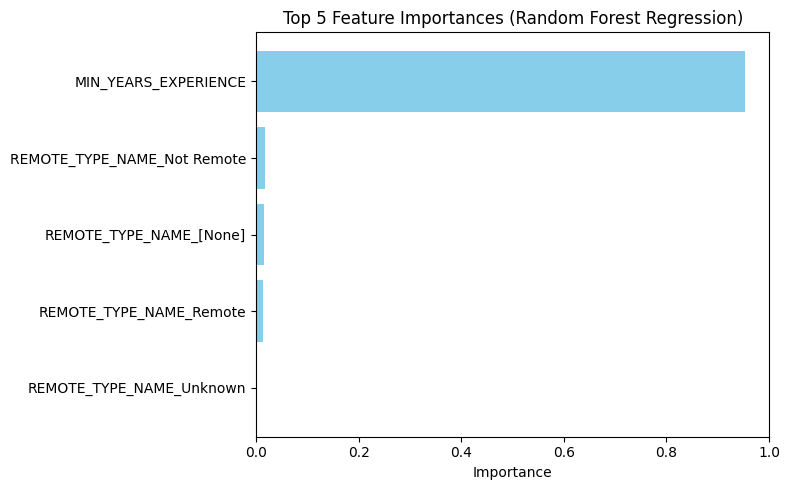

In [98]:
# Visual: Feature Importance Bar Chart
import pandas as pd

feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values('importance', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances (Random Forest Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Figure:** Top 5 features influencing salary predictions, as measured by the random forest model.

In [99]:
# Calculate absolute prediction error for each job
import pandas as pd
y_actual = y_test_filtered if 'y_test_filtered' in globals() else y_test
y_pred_series = pd.Series(y_pred, index=y_actual.index[:len(y_pred)])
errors = (y_actual - y_pred_series).abs()
outlier_indices = errors.nlargest(5).index

# Show the original job posting rows for these outliers
cols = ['SALARY', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'EMPLOYMENT_TYPE_NAME', 'REMOTE_TYPE_NAME']
cols = [c for c in cols if c in df.columns]
print(df.loc[outlier_indices, cols])

         SALARY  MIN_YEARS_EXPERIENCE REMOTE_TYPE_NAME
12166  312500.0                   1.0           [None]
23659  312000.0                   1.0           [None]
39897  328600.0                   5.0           [None]
2586   305000.0                   3.0           [None]
37324  338750.0                   7.0           [None]


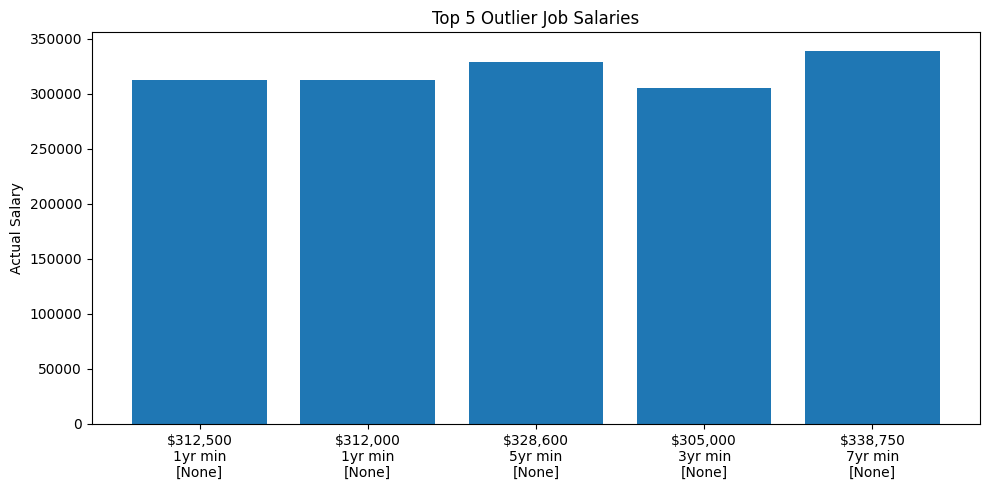

In [100]:
# Visual: Highlight Outliers in Predicted vs. Actual Salary

import pandas as pd
import matplotlib.pyplot as plt

emp_col = next((c for c in ["EMPLOYMENT_TYPE_NAME","REMOTE_TYPE_NAME","STATE_NAME","MSA_NAME"] if c in df.columns), None)

subset_cols = ["SALARY","MIN_YEARS_EXPERIENCE"] + ([emp_col] if emp_col else [])
subset = df.loc[outlier_indices, subset_cols].copy()

def _fmt_sal(x): 
    return f"${int(x):,}" if pd.notna(x) else "N/A"

def _fmt_exp(x): 
    return f"{int(x)}yr min" if pd.notna(x) else "n/a"

def _fmt_emp(x): 
    return str(x) if pd.notna(x) else "n/a"

if emp_col:
    labels = [
        f"{_fmt_sal(s)}\n{_fmt_exp(m)}\n{_fmt_emp(e)}"
        for s, m, e in zip(subset["SALARY"], subset["MIN_YEARS_EXPERIENCE"], subset[emp_col])
    ]
else:
    labels = [
        f"{_fmt_sal(s)}\n{_fmt_exp(m)}"
        for s, m in zip(subset["SALARY"], subset["MIN_YEARS_EXPERIENCE"])
    ]

plt.figure(figsize=(10, 5))
plt.bar(labels, subset["SALARY"].fillna(0))
plt.ylabel("Actual Salary")
plt.title("Top 5 Outlier Job Salaries")
plt.tight_layout()
plt.show()

**Figure:** Actual salaries of the five largest outlier jobs. Job experience and employment type are shown in labels.

### Outlier Jobs and Market Signals

The largest residuals include postings above **$300,000** with only **1–5 years** minimum experience, often missing a remote/on-site label. These cases point to specialized, high-impact roles where compensation is decoupled from tenure (e.g., advanced analytics, cloud/platform, niche leadership).

**Business relevance**  
- **Employers:** Standardize and QA high-pay, low-tenure postings, unclear fields and atypical mixes should be reviewed before publication.  
- **Job seekers:** Outliers highlight skill paths where focused upskilling can command premium pay earlier in a career.

## Classification – Predicting Remote vs On-Site Job

Accuracy: 0.622, F1 Score: 0.327


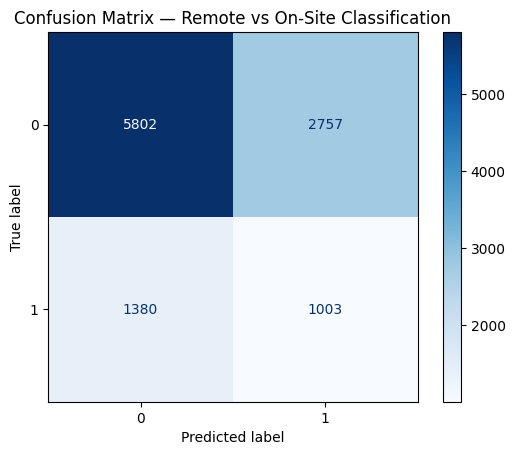

In [101]:
# Classification: Predicting Remote vs On-Site Jobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Prepare data
emp_col = "EMPLOYMENT_TYPE_NAME" if "EMPLOYMENT_TYPE_NAME" in df.columns else ("STATE_NAME" if "STATE_NAME" in df.columns else ("MSA_NAME" if "MSA_NAME" in df.columns else None))
if emp_col is not None:
    clf_df = df[["MIN_YEARS_EXPERIENCE", emp_col, "REMOTE_TYPE_NAME"]].dropna().copy() # Removed MAX_YEARS_EXPERIENCE
else:
    clf_df = df[["MIN_YEARS_EXPERIENCE", "REMOTE_TYPE_NAME"]].dropna().copy() # Removed MAX_YEARS_EXPERIENCE
clf_df["IS_REMOTE"] = clf_df["REMOTE_TYPE_NAME"].str.contains("Remote", case=False, na=False).astype(int)

X = clf_df[["MIN_YEARS_EXPERIENCE", emp_col]].copy() if emp_col is not None else clf_df[["MIN_YEARS_EXPERIENCE"]].copy() # Removed MAX_YEARS_EXPERIENCE
y = clf_df["IS_REMOTE"]

# One-hot encode employment type
if emp_col is not None:
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), [emp_col]),
        ("num", "passthrough", ["MIN_YEARS_EXPERIENCE"]) # Removed MAX_YEARS_EXPERIENCE
    ])
else:
    preprocessor = ColumnTransformer([
        ("num", "passthrough", ["MIN_YEARS_EXPERIENCE"]) # Removed MAX_YEARS_EXPERIENCE
    ])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model
clf = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight='balanced'))
])
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {acc:.3f}, F1 Score: {f1:.3f}")

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot(cmap="Blues")
plt.title("Confusion Matrix — Remote vs On-Site Classification")
plt.show()

### Classification Results and Interpretation

We trained a logistic regression to predict **Remote vs On-Site** using **MIN_YEARS_EXPERIENCE** plus an available categorical descriptor (e.g., employment type or state).

**Performance**  
- **Accuracy:** 0.622  
- **F1 Score:** 0.327  

**What this means**  
The model distinguishes remote vs. on-site at a **moderate** level, consistent with the idea that remote status is **policy/role-design driven**, not primarily a function of required experience.

**Business relevance**  
- **Employers:** Remote flexibility can be offered across experience levels without materially distorting supply. If remote status is strategic, emphasize role/industry signals rather than tenure in postings.  
- **Job seekers:** Remote options exist from entry to senior levels, broadening geographic reach and negotiation leverage.


In [ ]:
# Check columns to confirm MAX_YEARS_EXPERIENCE is removed
print([col for col in df.columns if "MAX_YEARS_EXPERIENCE" in col])

[]
